In [1]:
# Import Dependencies
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\hare krishna\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load Data
mnist = input_data.read_data_sets('./dataset/MNIST_Data/', one_hot=True)

Extracting ./dataset/MNIST_Data/train-images-idx3-ubyte.gz
Extracting ./dataset/MNIST_Data/train-labels-idx1-ubyte.gz
Extracting ./dataset/MNIST_Data/t10k-images-idx3-ubyte.gz
Extracting ./dataset/MNIST_Data/t10k-labels-idx1-ubyte.gz


In [3]:
# Reset Default Graph
tf.reset_default_graph()

## Stacked AutoEncoder

In [4]:
# 1st Layer: Input Layer
n_inputs = 784

# 1st Hidden Layer Neurons
hidden1 = 392

# 2nd Hidden Layer Neurons
hidden2 = 196

# 3rd Hidden Layer Neurons
hidden3 = 392

# Output Layer Neurons
out = 784

In [5]:
lr = 0.01

In [6]:
activation_fxn = tf.nn.relu

In [7]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])

In [8]:
# Initialize Weights
initializer = tf.variance_scaling_initializer()

In [9]:
# Initialize Weights for Autoencoder Layers
w1 = tf.Variable(initializer([n_inputs,hidden1]), dtype=tf.float32)
w2 = tf.Variable(initializer([hidden1,hidden2]), dtype=tf.float32)
w3 = tf.Variable(initializer([hidden2,hidden3]), dtype=tf.float32)
w4 = tf.Variable(initializer([hidden3,out]), dtype=tf.float32)

In [10]:
# Initialize Bias
b1 = tf.Variable(tf.zeros(hidden1))
b2 = tf.Variable(tf.zeros(hidden2))
b3 = tf.Variable(tf.zeros(hidden3))
b4 = tf.Variable(tf.zeros(out))

In [11]:
# Make Hidden Layers
hid_layer1 = activation_fxn(tf.matmul(X,w1) + b1)
hid_layer2 = activation_fxn(tf.matmul(hid_layer1,w2) + b2)
hid_layer3 = activation_fxn(tf.matmul(hid_layer2,w3) + b3)
out_layer = activation_fxn(tf.matmul(hid_layer3,w4) + b4)

In [12]:
loss = tf.reduce_mean(tf.square(out_layer - X))

In [13]:
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)

In [14]:
init = tf.global_variables_initializer()

In [15]:
saver = tf.train.Saver()

In [16]:
epochs = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    for e in range(epochs):
        n_batches = mnist.train.num_examples // batch_size
        
        for i in range(n_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={X: X_batch})
        
        training_loss = loss.eval(feed_dict={X:X_batch})
        print('EPOCH: {}\t  LOSS: {}'.format(e, training_loss))
    saver.save(sess,'./output/Stacked_Autoencoder/')

EPOCH: 0	  LOSS: 0.035459253937006
EPOCH: 1	  LOSS: 0.032120369374752045
EPOCH: 2	  LOSS: 0.031990960240364075
EPOCH: 3	  LOSS: 0.03108733892440796
EPOCH: 4	  LOSS: 0.03151610866189003


In [17]:
n_test = 10

with tf.Session() as sess:
    saver.restore(sess,'./output/Stacked_Autoencoder/')
    
    results = out_layer.eval(feed_dict={X: mnist.test.images[:n_test]})

INFO:tensorflow:Restoring parameters from ./output/Stacked_Autoencoder/


In [18]:
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

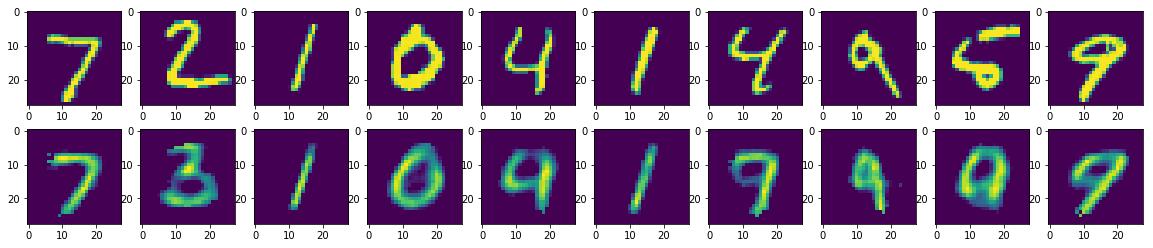

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=10, figsize=(20,4))
for i in range(n_test):
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(results[i],(28,28)))

In [23]:
n_test = 10

with tf.Session() as sess:
    saver.restore(sess,'./output/Stacked_Autoencoder/')
    
    results = hid_layer2.eval(feed_dict={X: mnist.test.images[:n_test]})

INFO:tensorflow:Restoring parameters from ./output/Stacked_Autoencoder/


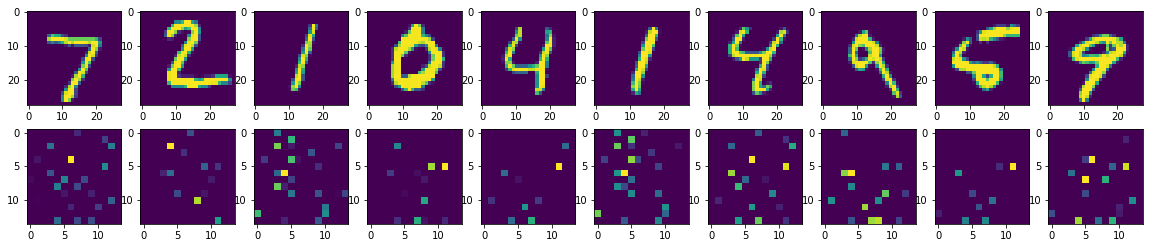

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=10, figsize=(20,4))
for i in range(n_test):
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(results[i],(14,14)))